In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
heart_disease= pd.read_csv("heart_disease_encoded.csv")
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,1,8.0,0,0,0


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302823 entries, 0 to 302822
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      302823 non-null  int64  
 1   BMI               302823 non-null  float64
 2   Smoking           302823 non-null  int64  
 3   AlcoholDrinking   302823 non-null  int64  
 4   Stroke            302823 non-null  int64  
 5   PhysicalHealth    302823 non-null  float64
 6   MentalHealth      302823 non-null  float64
 7   DiffWalking       302823 non-null  int64  
 8   Sex               302823 non-null  int64  
 9   AgeCategory       302823 non-null  int64  
 10  Race              302823 non-null  float64
 11  Diabetic          302823 non-null  float64
 12  PhysicalActivity  302823 non-null  int64  
 13  GenHealth         302823 non-null  int64  
 14  SleepTime         302823 non-null  float64
 15  Asthma            302823 non-null  int64  
 16  KidneyDisease     30

In [4]:
heart_disease.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

## Elliott’s Questions: 


### 1. Does biological sex and bmi influence if someone develops a heart disease or not? 


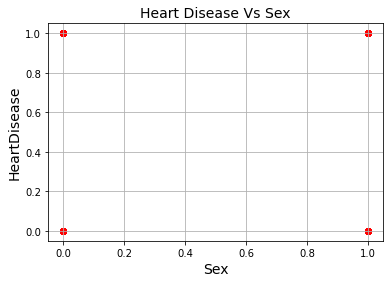

In [5]:
plt.scatter(heart_disease['Sex'], heart_disease['HeartDisease'], color='red')
plt.title('Heart Disease Vs Sex', fontsize=14)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('HeartDisease', fontsize=14)
plt.grid(True)
plt.show()

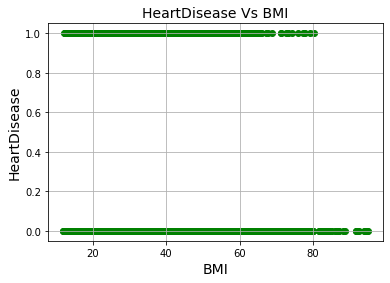

In [6]:
plt.scatter(heart_disease['BMI'], heart_disease['HeartDisease'], color='green')
plt.title('HeartDisease Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('HeartDisease', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
X = heart_disease[['BMI','Sex']]  
Y = heart_disease['HeartDisease']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # prediction with sklearn
Input_Sex = input('Enter your Sex Male "1", Female "0":')
Input_BMI = input('Enter your BMI \n(If Unknown, Visit https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm):')
print ('Predicted Heart Disease: \n', regr.predict([[Input_Sex ,Input_BMI ]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.007517458631582985
Coefficients: 
 [0.00214217 0.03833132]
Enter your Sex Male "1", Female "0":1
Enter your BMI 
(If Unknown, Visit https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm):22
Predicted Heart Disease: 
 [0.85294868]
                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1091.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:21:43   Log-Likelihood:                -44440.
No. Observations:              302823   AIC:                         8.889e+04
Df Residuals:                  302820   BIC:                         8.892e+04
Df Model:                           2                                         
Covariance Type:            n

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [8]:
Heart_Disease_mult_regression_formula = (0.007517458631582985) + (0.00214217)*1 + (0.03833132)*22
Heart_Disease_mult_regression_formula

0.852948668631583

In [9]:
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [10]:
X = heart_disease[['BMI','Sex']].astype(float)
Y = heart_disease['HeartDisease'].astype(float)
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Sex label and input box
label1 = tk.Label(root, text='Enter your Sex Male "1", Female "0": ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_BMI label and input box
label2 = tk.Label(root, text='Enter your BMI:')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global The_inputted_Sex #our 1st input variable
    Your_Sex = float(entry1.get()) 
    
    global The_inputted_BMI #our 2nd input variable
    Your_BMI = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Heart Disease: ', regr.predict([[Your_Sex ,Your_BMI]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Heart Disease',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(heart_disease['Sex'].astype(float),heart_disease['BMI'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Heart Disease']) 
ax3.set_xlabel('Sex')
ax3.set_title('Sex Vs. Heart Disease')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(heart_disease['BMI'].astype(float),heart_disease['HeartDisease'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Heart Disease']) 
ax4.set_xlabel('BMI')
ax4.set_title('BMI Vs. Heart Disease')

root.mainloop()

Intercept: 
 0.007517458631582985
Coefficients: 
 [0.00214217 0.03833132]


### 2.  Does BMI and kidney disease influence if someone develops heart disease? 


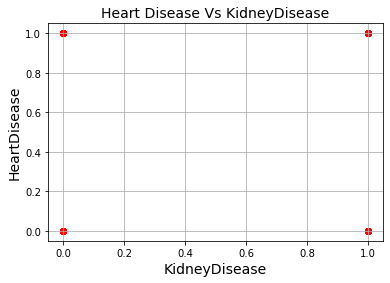

In [11]:
plt.scatter(heart_disease['KidneyDisease'], heart_disease['HeartDisease'], color='red')
plt.title('Heart Disease Vs KidneyDisease', fontsize=14)
plt.xlabel('KidneyDisease', fontsize=14)
plt.ylabel('HeartDisease', fontsize=14)
plt.grid(True)
plt.show()

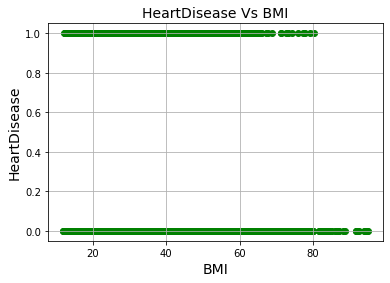

In [12]:
plt.scatter(heart_disease['BMI'], heart_disease['HeartDisease'], color='green')
plt.title('HeartDisease Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('HeartDisease', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
X = heart_disease[['BMI','KidneyDisease']]  
Y = heart_disease['HeartDisease']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # prediction with sklearn
Input_KD = input('Enter if you had kidney disease Yes "1", No "0":')
Input_BMI = input('Enter your BMI \n(If Unknown, Visit https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm):')
print ('Predicted Heart Disease: \n', regr.predict([[Input_KD ,Input_BMI ]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.024608234818920577
Coefficients: 
 [0.00190591 0.21301384]
Enter if you had kidney disease Yes "1", No "0":1
Enter your BMI 
(If Unknown, Visit https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm):22
Predicted Heart Disease: 
 [4.71281869]
                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3574.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:22:15   Log-Likelihood:                -41995.
No. Observations:              302823   AIC:                         8.400e+04
Df Residuals:                  302820   BIC:                         8.403e+04
Df Model:                           2                                         
Covariance Type: 

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [14]:
Heart_Disease_mult_regression_formula_2 = (0.024608234818920577) + (0.00190591)*0 + (0.21301384)*11
Heart_Disease_mult_regression_formula_2

2.3677604748189207

In [15]:
X = heart_disease[['BMI','KidneyDisease']].astype(float)
Y = heart_disease['HeartDisease'].astype(float)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_KD label and input box
label1 = tk.Label(root, text='Enter if you had kidney disease Yes "1", No "0":')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_BMI label and input box
label2 = tk.Label(root, text='Enter your BMI:')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global The_inputted_kidney_disease #our 1st input variable
    Your_KD = float(entry1.get()) 
    
    global The_inputted_BMI #our 2nd input variable
    Your_BMI = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Heart Disease: ', regr.predict([[Your_KD ,Your_BMI]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Heart Disease',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(heart_disease['KidneyDisease'].astype(float),heart_disease['BMI'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Heart Disease']) 
ax3.set_xlabel('KidneyDisease')
ax3.set_title('KidneyDisease Vs. Heart Disease')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(heart_disease['BMI'].astype(float),heart_disease['HeartDisease'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Heart Disease']) 
ax4.set_xlabel('BMI')
ax4.set_title('BMI Vs. Heart Disease')

root.mainloop()

Intercept: 
 0.024608234818920577
Coefficients: 
 [0.00190591 0.21301384]
